# UN5550-FALL 2018
# PROJECT 4
SANJANA KRITHI

In [1]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
import matplotlib.image as mpimg

/home/campus24/skrithi/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#loading the data set
data = MNIST()
train_images, train_labels = data.load_training()
test_images, test_labels =  data.load_testing()

Xii = train_images
Xi = np.asarray(Xii) 
yi = train_labels
yi = np.asarray(yi)
Xj = test_images
Xj = np.asarray(Xj)
yj = test_labels
yj = np.asarray(yj)


# que3
For the training data set, display a few of these images (at least one of each hand written digit). We have not given you explicit instruction on how to view image files, but hopefully you can figure out how to use matplotlib's imshow command.

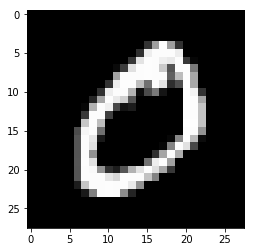

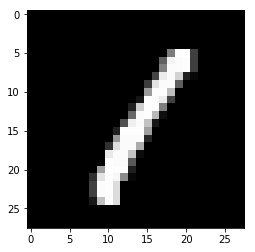

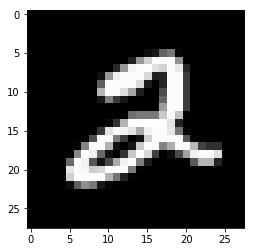

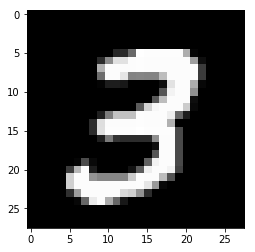

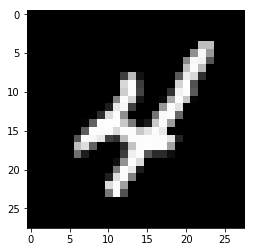

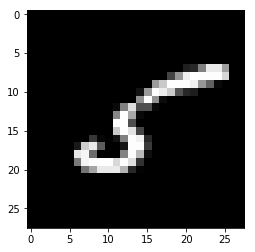

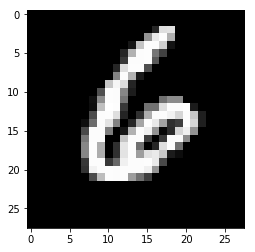

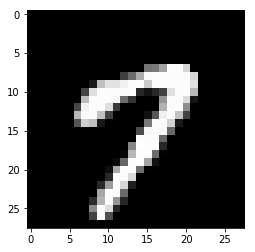

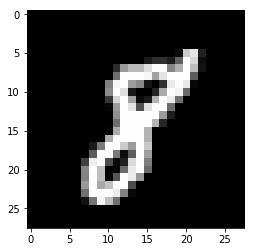

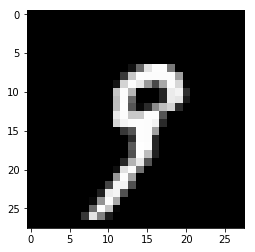

In [3]:
a = 0#image value
b = 0#value from Xi
while a<10:#comparing for the value less than 10
    if(yi[b]==a):#if the value is equal to the value in array
        first_image = np.array(Xi[b], dtype='float')#print the image
        pixels = first_image.reshape((28, 28))
        plt.imshow(pixels, cmap='gray')
        plt.show()
        a=a+1
        b=b+1
    b = b+1


# que4
In your own words, explain how the K nearest neighbor (KNN) algorithm works.


step 1:Load the data
step 2: We initialise the value of k
step 3: We predicted class, iterate from 1 to total number of train data points
step 4: We calculate the distace(eucilidian) between test data and each row of train data.
step 5: We sort the data and choose the data point that has the least distance. We arrange them in a ascending order.
step 6: We choose the top k rows from the array
step 7: Select the most common classes that becomes our predicted class.
      





# que 5&6
Develop python functions to compute the accuracy, sensitivity, specificity, precision and negative predictive value.
Apply a KNN Classifier with n_neighbors = {3,4,5}. For each model,
compute the confusion matrix, as applied to the test set
report the accuracy, sensitivity, specificity, precision and negative predictive value using your developed functions.
compare the different models,

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#creating the confusion matrix fo k=3
knn3 = KNeighborsClassifier(n_neighbors=3)#nub of neighbouts for k=3
knn3.fit(Xi,yi)#fitting the model when k =3
pred3 = knn3.predict(Xj)#prediction value for  k=3
C = np.empty([10,10])
for i in range(10):
    for j in range(10):
        C[i,j] = np.sum(np.logical_and(pred3==i, yj==j))
#printing the FP,FN,TP,TN values from confusion matrix
FP3 = C.sum(axis=0) - np.diag(C)  
FN3 = C.sum(axis=1) - np.diag(C)
TP3 = np.diag(C)
TN3 = C.sum() - (FP3 + FN3 + TP3)



In [11]:
def accuracy3(TP3,TN3,FP3,FN3):
    return ((TP3+TN3)/(TP3+FP3+FN3+TN3))
np.nanmean(accuracy3(TP3,TN3,FP3,FN3))

0.9940999999999999

In [12]:
def specificity3(TP3,TN3,FP3,FN3):
     return ((TN3)/(TN3+FP3))
np.nanmean(specificity3(TP3,TN3,FP3,FN3))

0.9967306517939212

In [13]:
def precision3(TP3,TN3,FP3,FN3):
     return (TP3/(TP3+FP3))
np.nanmean(precision3(TP3,TN3,FP3,FN3))

0.9701144344783679

In [14]:
def NegativePredictiveValue3(TP3,TN3,FP3,FN3):
     return (TN3/(TN3+FN3))
np.nanmean(NegativePredictiveValue3(TP3,TN3,FP3,FN3))

0.9967173661428509

In [15]:
def sensitivity3(TP3,TN3,FP3,FN3):
     return (TP3/(TP3+FN3))
np.nanmean(sensitivity3(TP3,TN3,FP3,FN3))


0.9709116052270813

In [16]:
def recall3(TP3,TN3,FP3,FN3):
     return (TP3)/(TP3+TN3)
np.nanmean(recall3(TP3,TN3,FP3,FN3))

0.09762492716842837

#Doing the knn for k =4 and defing the acuracy,snsitivity,specificity, npv and precision

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn4 = KNeighborsClassifier(n_neighbors=4)#nub of neighbouts for k=4
knn4.fit(Xi,yi)#fitting the model when k =4
pred4 = knn4.predict(Xj)#prediction value for  k=4
C4 = np.empty([10,10])
for i in range(10):
    for j in range(10):
        C4[i,j] = np.sum(np.logical_and(pred4==i, yj==j))
FP4 = C4.sum(axis=0) - np.diag(C4)  
FN4 = C4.sum(axis=1) - np.diag(C4)
TP4 = np.diag(C4)
TN4 = C4.sum() - (FP4 + FN4 + TP4)



In [18]:
def accuracy4(TP4,TN4,FP4,FN4):
    return ((TP4+TN4)/(TP4+FP4+FN4+TN4))
np.nanmean(accuracy4(TP4,TN4,FP4,FN4))

0.9936399999999999

In [19]:
def specificity4(TP4,TN4,FP4,FN4):
     return ((TN4)/(TN4+FP4))
np.nanmean(specificity4(TP4,TN4,FP4,FN4))

0.9964774191682387

In [20]:
def precision4(TP4,TN4,FP4,FN4):
     return (TP4/(TP4+FP4))
np.nanmean(precision4(TP4,TN4,FP4,FN4))

0.9678438027213476

In [21]:
def NegativePredictiveValue4(TP4,TN4,FP4,FN4):
     return (TN4/(TN4+FN4))
np.nanmean(NegativePredictiveValue4(TP4,TN4,FP4,FN4))

0.9964615741445423

In [22]:
def sensitivity4(TP4,TN4,FP4,FN4):
     return (TP4/(TP4+FN4))
np.nanmean(sensitivity4(TP4,TN4,FP4,FN4))


0.9687428134382345

In [23]:
def recall4(TP4,TN4,FP4,FN4):
     return (TP4)/(TP4+TN4)
np.nanmean(recall4(TP4,TN4,FP4,FN4))

0.09743851498499186

Doing the knn for k =5 and defing the acuracy,sensitivity,specificity, npv and precision

In [25]:


from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors=5)#nub of neighbouts for k=5
knn5.fit(Xi,yi)#fitting the model when k =5
pred5 = knn5.predict(Xj)#prediction value for  k=5
C5 = np.empty([10,10])
for i in range(10):
    for j in range(10):
        C5[i,j] = np.sum(np.logical_and(pred5==i, yj==j))

FP5 = C5.sum(axis=0) - np.diag(C5)  
FN5 = C5.sum(axis=1) - np.diag(C5)
TP5 = np.diag(C5)
TN5 = C5.sum() - (FP5 + FN5 + TP5)



In [26]:
def accuracy5(TP5,TN5,FP5,FN5):
    return ((TP5+TN5)/(TP5+FP5+FN5+TN5))
np.nanmean(accuracy5(TP5,TN5,FP5,FN5))

0.99376

In [27]:
def specificity5(TP5,TN5,FP5,FN5):
     return ((TN5)/(TN5+FP5))
np.nanmean(specificity5(TP5,TN5,FP5,FN5))

0.9965418102466632

In [28]:
def precision5(TP5,TN5,FP5,FN5):
     return (TP5/(TP5+FP5))
np.nanmean(precision5(TP5,TN5,FP5,FN5))

0.9684705010297703

In [29]:
def NegativePredictiveValue5(TP5,TN5,FP5,FN5):
     return (TN5/(TN5+FN5))
np.nanmean(NegativePredictiveValue5(TP5,TN5,FP5,FN5))

0.9965279483149369

In [30]:
def sensitivity5(TP5,TN5,FP5,FN5):
     return (TP5/(TP5+FN5))
np.nanmean(sensitivity5(TP5,TN5,FP5,FN5))

0.9692753386570571

In [31]:
def recall5(TP5,TN5,FP5,FN5):
     return (TP5)/(TP5+TN5)
np.nanmean(recall5(TP5,TN5,FP5,FN5))

0.09748795013892853

Based on the presicion, recall and accuracy all of them are pretty similar hence while choosing our model we can choose for k=3 as it less complex.

# que 7
Apply an SVM classifier. Again, report the confusion matrix, as well as the accuracy, sensitivity, specificity, precision and negative predictive value. How does the SVN classifier compare to the KNN classifiers?

In [3]:
#applied my svm model for chunk of 10000  from my data
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear', random_state = 0)#applied svm with linaer kernel
svm_linear.fit(Xi[:10000], yi[:10000])#fitting the model for train_images, train_labels
pred_svm_linear = svm_linear.predict(Xj[:10000])#Predicting the train images

In [4]:
C_svm = np.empty([10,10])
for i in range(10):
    for j in range(10):
        C_svm[i,j] = np.sum(np.logical_and(pred_svm_linear==i, yj==j))

FPs = C_svm.sum(axis=0) - np.diag(C_svm)  
FNs = C_svm.sum(axis=1) - np.diag(C_svm)
TPs = np.diag(C_svm)
TNs = C_svm.sum() - (FPs + FNs + TPs)


In [5]:
def accuracys(TPs,TNs,FPs,FNs):
    return ((TPs+TNs)/(TPs+FPs+FNs+TNs))
np.nanmean(accuracys(TPs,TNs,FPs,FNs))

0.98246

In [6]:
def specificitys(TPs,TNs,FPs,FNs):
     return ((TNs)/(TNs+FPs))
np.nanmean(specificitys(TPs,TNs,FPs,FNs))

0.9902897394461052

In [7]:
def precisions(TPs,TNs,FPs,FNs):
     return (TPs/(TPs+FPs))
np.nanmean(precisions(TPs,TNs,FPs,FNs))

0.9108182664021456

In [8]:
def NegativePredictiveValues(TPs,TNs,FPs,FNs):
     return (TNs/(TNs+FNs))
np.nanmean(NegativePredictiveValues(TPs,TNs,FPs,FNs))

0.9902579205865136

In [9]:
def sensitivitys(TPs,TNs,FPs,FNs):
     return (TPs/(TPs+FNs))
np.nanmean(sensitivitys(TPs,TNs,FPs,FNs))

0.9115747407486351

In [10]:
def recalls(TPs,TNs,FPs,FNs):
     return (TPs)/(TPs+TNs)
np.nanmean(recalls(TPs,TNs,FPs,FNs))

0.09281834732937298

based on the statistics values we can say that knn is a better model to work with.